# MSDS 430 - Final Project - Alison Au

## Reading, Previewing, and Merging Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

orders_df = pd.read_csv('../Instacart_Data/orders.csv')
order_prod_prior_df = pd.read_csv('../Instacart_Data/order_products__prior.csv')
order_prod_train_df = pd.read_csv('../Instacart_Data/order_products__train.csv')
prod_df = pd.read_csv('../Instacart_Data/products.csv')

In [2]:
# Orders by user
orders_df.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [3]:
orders_df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [4]:
# These next 3 files will be merged to one dataset with order and product-level data

# Products in orders prior to users' last order
order_prod_prior_df.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


In [5]:
# Products in users' last order 
order_prod_train_df.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [6]:
# Product match table
prod_df.head(20)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [7]:
# Merge product-level data for all orders: products_train (products in users' last order) and products_prior 
# (products in orders prior to the last)
orders_prod_df = pd.concat([order_prod_train_df, order_prod_prior_df])

# Merge product details
orders_prod_df = pd.merge(orders_prod_df, prod_df, on='product_id', how='left')
orders_prod_df.head(20)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,1,49302,1,1,Bulgarian Yogurt,120,16
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16
2,1,10246,3,0,Organic Celery Hearts,83,4
3,1,49683,4,0,Cucumber Kirby,83,4
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15
5,1,13176,6,0,Bag of Organic Bananas,24,4
6,1,47209,7,0,Organic Hass Avocado,24,4
7,1,22035,8,1,Organic Whole String Cheese,21,16
8,36,39612,1,0,Grated Pecorino Romano Cheese,2,16
9,36,19660,2,1,Spring Water,115,7


In [8]:
orders_prod_df.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,7.121799e+01,9.918544e+00
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,3.819898e+01,6.281655e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01


## Exploratory Data Analysis

### Orders Per User

In [9]:
# Number of orders per user
user_ordervol = orders_df.groupby('user_id').agg(orders = ('order_id', len))

# Mean and median number of orders
mean_orders = np.mean(user_ordervol['orders'])
median_orders = np.median(user_ordervol['orders'])

print(f'The mean number of orders per customer is {mean_orders:.1f}')
print(f'The median number of orders per customer is {median_orders:.1f}')

The mean number of orders per customer is 16.6
The median number of orders per customer is 10.0


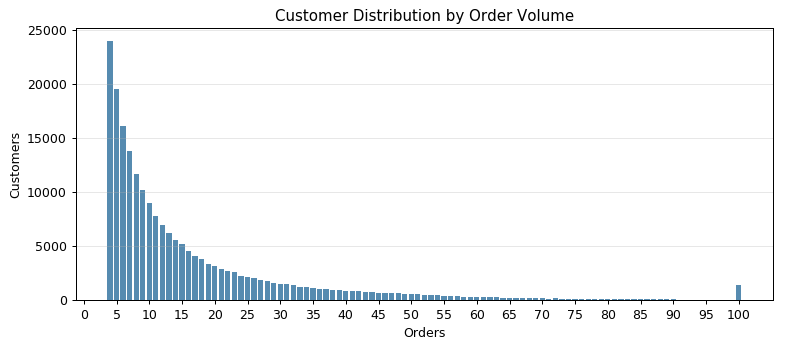

In [10]:
# Plot histogram of order volume
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':90})

plt.hist(user_ordervol['orders'], bins=np.arange \
         (min(user_ordervol['orders']), max(user_ordervol['orders']) + 1.5, 1) - 0.5, rwidth=0.8, color='#568bb0')
plt.xticks(np.arange(0, max(user_ordervol['orders']) + 1.5, 5))
plt.grid(axis='y', alpha=0.3)
plt.gca().set(title='Customer Distribution by Order Volume', ylabel='Customers', xlabel='Orders');

# Confirming the description of the data Instacart provided, customers have between 4 to 100 orders.
# Expectedly, most customers placed just a few orders in 2017, though an uptick is seen with 100 orders.
# Since the distribution gradually decreases with no clear drop-off, customers will be segmented into even buckets
# of high/med/low frequency users.

### Segment Customers Into Low/Medium/High Frequency

In [11]:
# Segment users evenly into 3 groups based on order volume
user_ordervol['freq_cust'] = pd.qcut(user_ordervol['orders'], 3, labels=['low', 'med', 'high'])

freq_profile = user_ordervol.groupby('freq_cust').agg(
    users = ('orders', len),
    min_order = ('orders', min),
    max_order = ('orders', max),
    mean_order = ('orders', 'mean'),
    median_order = ('orders', 'median')).to_string(
    formatters = {'users': '{:,}'.format,
                 'mean_order': '{:.1f}'.format})

print(freq_profile)

# Low-frequency customers have 4-7 orders, medium have 8-16, and high have 17-100. 
# Segment sizes are not exactly equal since customers with the same order volume cannot be divided into 
# separate groups.

           users  min_order  max_order mean_order  median_order
freq_cust                                                      
low       73,591          4          7        5.3             5
med       67,322          8         16       11.2            11
high      65,296         17        100       34.9            28


In [12]:
# Add segments to order-level and product-level data sets
orders_df = pd.merge(orders_df, user_ordervol, on='user_id', how='left')
orders_prod_df = pd.merge(orders_prod_df, orders_df[['order_id', 'freq_cust']], on='order_id', how='left')

### Products Per Order

In [13]:
# Number of products per order
order_prodvol = orders_prod_df.groupby('order_id')['product_id'].count()

# Mean and median number of products per order
mean_products = np.mean(order_prodvol)
median_products = np.median(order_prodvol)

print(f'The mean number of products per order is {mean_products:.1f}')
print(f'The median number of products per order is {median_products:.1f}')

The mean number of products per order is 10.1
The median number of products per order is 8.0


In [14]:
# Number of products per order - high vs. low frequency customers
order_prodvol_seg = orders_prod_df.groupby(['order_id', 'freq_cust']).agg(
    products = ('product_id', len)).reset_index()
order_prodvol_seg = order_prodvol_seg[order_prodvol_seg['products'].notnull()]

order_prodvol_seg2 = order_prodvol_seg.groupby('freq_cust').agg(
    mean_products = ('products', 'mean'),
    median_products = ('products', 'median')).to_string(
    formatters = {'mean_products': '{:.1f}'.format,
                 'median_products': '{:.1f}'.format})

print(order_prodvol_seg2)

# Interestingly, customers tend to buy a similar number of products per order, regardless of whether they're frequent
# customers or not.
# Moving forward, we'll focus more on high vs. low customers to differentiate either end of the spectrum. Data for
# medium-frequency users will still be shown in tabular results.

          mean_products median_products
freq_cust                              
low                 9.7             8.0
med                10.0             8.0
high               10.2             8.0


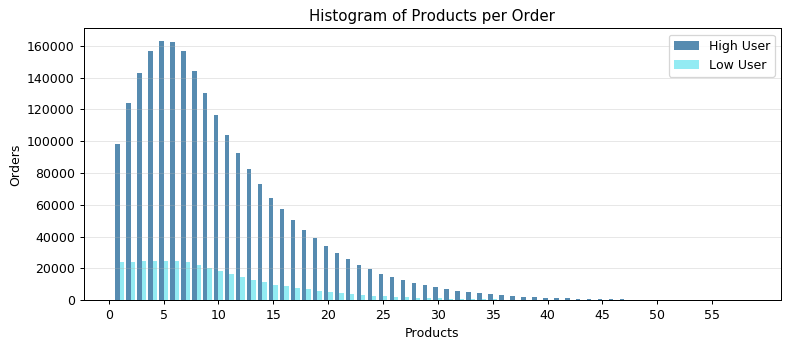

In [15]:
# Plot histogram of products per order
high_user = order_prodvol_seg.loc[order_prodvol_seg['freq_cust'] == 'high']
low_user = order_prodvol_seg.loc[order_prodvol_seg['freq_cust'] == 'low']

plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':90})

plt.hist([high_user['products'], low_user['products']], bins=np.arange(min(order_prodvol_seg['products']), 60, 1)-0.5, \
         rwidth = 0.8, color = ['#568bb0', '#93EBF3'], label = ['High User', 'Low User'])
plt.xticks(np.arange(0, 60, 5))
plt.grid(axis='y', alpha=0.3)
plt.gca().set(title='Histogram of Products per Order', ylabel='Orders', xlabel='Products')
plt.legend(loc='upper right');

# High users commonly buy 5-6 products per order, likely because they will wait to buy groceries once they need a 
# few items, especially if they have to pay a delivery fee.
# This trend is less pronounced among low users, who purchase 1-7 products per order. Many are likely just testing
# out Instacart.

### Top Products

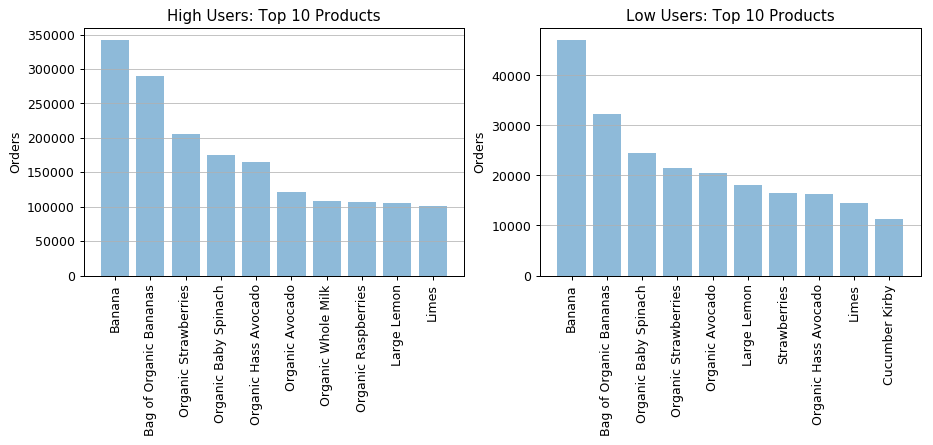

In [16]:
# Plot product best sellers
prod_cnt_seg = orders_prod_df.groupby(['freq_cust','product_name']).agg(orders = ('order_id', len)).reset_index()

user_prod = [prod_cnt_seg.loc[prod_cnt_seg['freq_cust'] == 'high']. \
             sort_values('orders', ascending = False).reset_index().head(10), \
             prod_cnt_seg.loc[prod_cnt_seg['freq_cust'] == 'low']. \
             sort_values('orders', ascending = False).reset_index().head(10)]

fig = plt.figure(figsize = (12,8), dpi = 90)
ax = [fig.add_subplot(221), fig.add_subplot(222)]
title = ['High', 'Low']

for i, j in enumerate(ax):
    y_pos = np.arange(len(user_prod[i]['product_name']))
    j.bar(y_pos, user_prod[i]['orders'], align='center', alpha=0.5)
    j.set_xticklabels(user_prod[i]['product_name'], rotation = 90)
    j.set_title(title[i] + ' Users: Top 10 Products') 
    j.set_ylabel('Orders')
    j.set_xticks(y_pos)
    j.grid(axis='y', alpha = 0.75)

# Top sellers are similar across both high and low customers.
# Fresh produce, especially bananas are the most bought items, aligning with how many customers make weekly purchases
# Organic products are also popular

In [17]:
# Percentage of reorders
reord_pct = orders_prod_df.reordered.sum() / orders_prod_df.shape[0]

print(f'{reord_pct:.1%} of products ordered were reorders.')

59.0% of products ordered were reorders.


In [18]:
# Percentage of reorders - high vs. low frequency customers
reorder_prodvol = orders_prod_df.groupby(['freq_cust', 'reordered']).agg(products = ('product_id', len))
reorder_pct = reorder_prodvol.groupby(level = 0).apply(lambda x: x/x.sum()). \
    rename(columns={'products': 'reorder_pct'}). \
    to_string(formatters = {'reorder_pct': '{:.1%}'.format})

print(reorder_pct)
# Only 31% of products ordered by low users were reorders, compared to 67% for high users

                    reorder_pct
freq_cust reordered            
low       0               69.5%
          1               30.5%
med       0               53.7%
          1               46.3%
high      0               32.6%
          1               67.4%


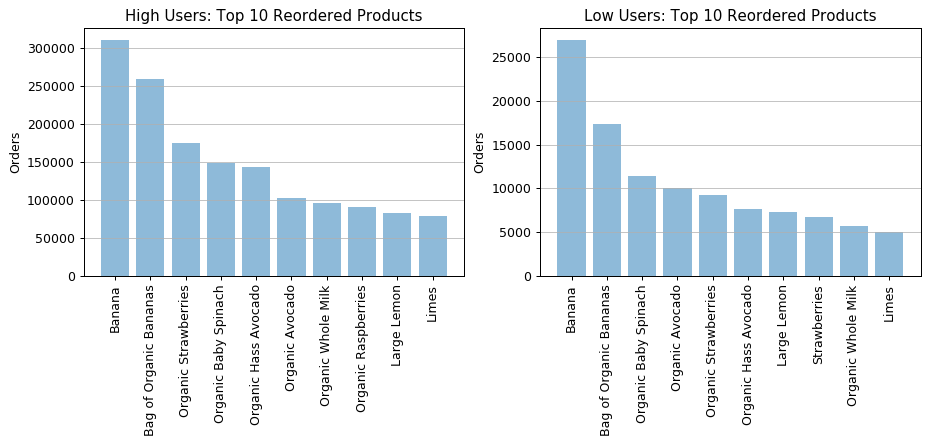

In [19]:
# Plot most reordered products
reord_prod = orders_prod_df.loc[orders_prod_df['reordered'] == 1]

reord_cnt_seg = reord_prod.groupby(['freq_cust','product_name']).agg(orders = ('order_id', len)).reset_index()
user_reord_prod = [reord_cnt_seg.loc[reord_cnt_seg['freq_cust'] == 'high']. \
             sort_values('orders', ascending = False).reset_index().head(10), \
             reord_cnt_seg.loc[reord_cnt_seg['freq_cust'] == 'low']. \
             sort_values('orders', ascending = False).reset_index().head(10)]

fig = plt.figure(figsize = (12,8), dpi = 90)
ax = [fig.add_subplot(221), fig.add_subplot(222)]
title = ['High', 'Low']

for i, j in enumerate(ax):
    y_pos = np.arange(len(user_reord_prod[i]['product_name']))
    j.bar(y_pos, user_reord_prod[i]['orders'], align='center', alpha=0.5)
    j.set_xticklabels(user_reord_prod[i]['product_name'], rotation = 90)
    j.set_title(title[i] + ' Users: Top 10 Reordered Products') 
    j.set_ylabel('Orders')
    j.set_xticks(y_pos)
    j.grid(axis='y', alpha = 0.75)

# The most reordered products are similar to the overall most sold products for both customer segments

### Days Between Orders

In [20]:
# Mean and median time between orders
mean_days_bt_orders = np.nanmean(orders_df['days_since_prior_order'])
median_days_bt_orders = np.nanmedian(orders_df['days_since_prior_order'])

print(f'The mean days between orders is {mean_days_bt_orders:.1f}')
print(f'The median days between orders is {median_days_bt_orders:.1f}')

The mean days between orders is 11.1
The median days between orders is 7.0


In [21]:
# Mean and median time between orders - high vs. low frequency customers
days_bt_orders_freq_cust = orders_df.groupby('freq_cust').agg(
    mean_days_bt_orders = ('days_since_prior_order', 'mean'),
    median_days_bt_orders = ('days_since_prior_order', 'median')).to_string(
    formatters = {'mean_days_bt_orders': '{:.1f}'.format,
                 'median_days_bt_orders': '{:.1f}'.format})

print(days_bt_orders_freq_cust)

# Not surprisingly and by definition, frequent customers order more often

          mean_days_bt_orders median_days_bt_orders
freq_cust                                          
low                      19.3                  21.0
med                      16.1                  14.0
high                      8.4                   6.0


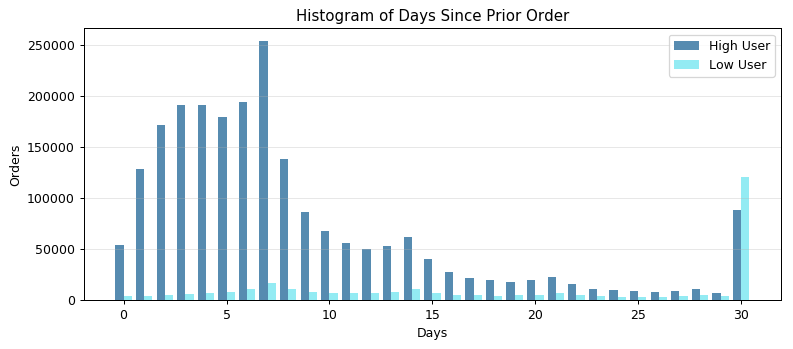

In [22]:
# Plot days between orders
days_bt_orders = orders_df[['freq_cust', 'days_since_prior_order']]. \
    fillna({'days_since_prior_order': -1}).astype({'days_since_prior_order': int})

days_bt_h = days_bt_orders.loc[days_bt_orders['freq_cust'] == 'high']
days_bt_l = days_bt_orders.loc[days_bt_orders['freq_cust'] == 'low']

plt.rcParams.update({'figure.figsize':(10,4), 'figure.dpi':90})

plt.hist([days_bt_h['days_since_prior_order'], days_bt_l['days_since_prior_order']],
         bins = np.arange(0, max(days_bt_h['days_since_prior_order']) + 1.5, 1) - 0.5, rwidth=0.8,
         color = ['#568bb0', '#93EBF3'], label = ['High User', 'Low User'])
plt.grid(axis='y', alpha=0.3)
plt.gca().set(title='Histogram of Days Since Prior Order', ylabel='Orders', xlabel='Days')
plt.legend(loc='upper right');

# Most people order around once a week, which makes sense for perishable groceries. A spike is also seen at 
# 30 days as this includes cases where the previous order is 30 or more days ago

### Time of Orders

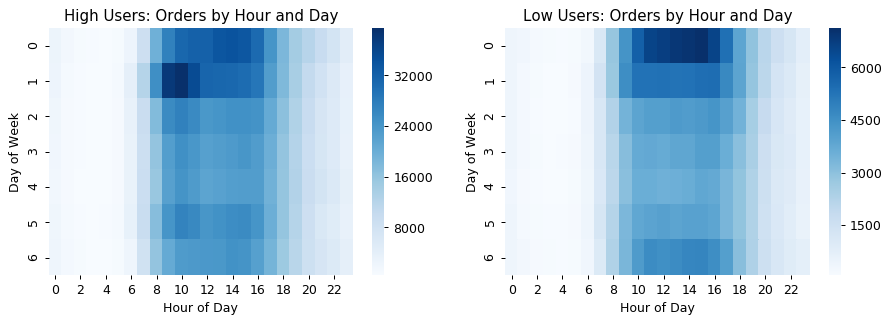

In [25]:
# Plot heatmap of orders by day of week and time of day
order_time = orders_df.groupby(['order_dow', 'order_hour_of_day', 'freq_cust']).agg(orders = ('order_id', len)). \
    reset_index()

order_time_h = order_time.loc[order_time['freq_cust'] == 'high'].pivot('order_dow', 'order_hour_of_day', 'orders')
order_time_l = order_time.loc[order_time['freq_cust'] == 'low'].pivot('order_dow', 'order_hour_of_day', 'orders')

order_time_seg = [order_time_h, order_time_l]

fig = plt.figure(figsize = (12,8), dpi = 90)
ax = [fig.add_subplot(221), fig.add_subplot(222)]
title = ['High', 'Low']

for i, j in enumerate(ax):     
    s = sns.heatmap(order_time_seg[i], cmap = 'Blues', ax = j)
    s.set_title(title[i] + ' Users: Orders by Hour and Day')
    s.set_ylabel('Day of Week')
    s.set_xlabel('Hour of Day')

# Orders spike Sunday afternoon and, for high users, Monday morning. People are likely getting groceries 
# for the week.
# Perhaps since purchasing on Instacart is not routine for low users, they do not spend their Monday mornings shopping.